# Author: Vaishnav Krishna P
### DataSet Source:https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies
# Intership: CodSoft(Movie Rating)

task:
* Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
* The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
* Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

In [331]:
# importing necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import math libraries 
import math
from scipy import stats

# uncompactable issues: removing the warnings
import warnings
warnings.filterwarnings(action="ignore")

# Printing option
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# Applying regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# training using train_test_split and cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, r2_score,mean_squared_error,mean_absolute_error

In [332]:
# importing the dataset 
df = pd.read_csv("IMDb Movies India.csv",encoding="latin")

In [333]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### Data Preprocessing
steps:
   1. Data Cleaning: Missing Value and noises
   2. Data Reduction: encoding,scaling
   3. Data Transformation: 
   4. Removing the constant feature:

#### Data Cleaning: Missing Value and noises

* firstly, we are removing all the features with the target variable is unknown.bcz,for 50 percent of the features target variable is missing  so better to remove.

In [334]:
# No of non null records in Rating
df["Rating"].count()

7919

In [335]:
# Ignoring the tuple with target value is unknown to reduce the noise 
df = df[df["Rating"].isnull() == False]

In [336]:
# shape of the dataset
df.shape

(7919, 10)

In [337]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


[]

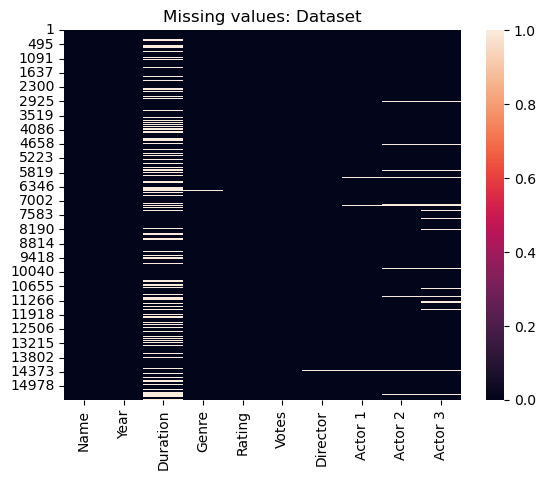

In [338]:
# Missing value analayisis
plt.title("Missing values: Dataset")
sns.heatmap(df.isnull())
plt.plot()

In [339]:
# Missing values 
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [340]:
# Filling the Genere with most most frequently occuring category ie,Drama
df["Genre"].fillna(df["Genre"].value_counts().index[0],inplace=True)

In [341]:
# Filling the Director with most most frequently occuring category ie,Mahesh Butt
df["Director"].fillna(df["Director"].value_counts().index[0],inplace=True)

In [342]:
# For Actor1,Actor2,Actor3: handling the missing value by Global constant ie,Unknown
for feature in ["Actor 1","Actor 2","Actor 3"]:
    df[feature].fillna("Unknown",inplace=True)

* Since, from our EDA we under stand that, Duration is not a very important parameter for deciding the rating.so,no need to handle the missing value for it any way we will remove later.but, just for a completness we will handle it with a global constant

In [343]:
# for Duration filling with global constant: "Missing"
df["Duration"].fillna("Missing",inplace=True)

* Missing value hanlding Completed

### Feature Engineering
* 1.Discretising the year feature to 8 bins
* 2.Creating Binary features from the Genre

In [344]:
df["Year"].head(2)

1    (2019)
3    (2019)
Name: Year, dtype: object

In [345]:
# removing the "(" and ")" in the Year feature
df["Year"] = df["Year"].str.replace("(","").str.replace(")","")

In [346]:
# type casting in to int datatype
df["Year"] = df["Year"].astype("int")
df["Year"].dtype

dtype('int64')

In [347]:
df["Year"].nunique()

92

In [348]:
# Making a new Feature with 8 bins
df["YearCategorical"] = 0 * len(df)
def YearEncoding(x):
    if x in range(1917,1960):
        return "VeryVeryOld"
    elif x in range(1960,1970):
        return "1960s"
    elif x in range(1970,1980):
        return "1970s"
    elif x in range(1980,1990):
        return "1980s"
    elif x in range(1990,2000):
        return "1990s"
    elif x in range(2000,2010):
        return "2000s"
    elif x in range(2010,2020):
        return "2010s"
    elif x in range(2020,2030):
        return "2020s"
for i in range(len(df)):
    df["YearCategorical"].iloc[i] = YearEncoding(df["Year"].iloc[i])

In [349]:
# Odinal Encoding
year_dict = {"VeryVeryOld":1,"1960s":2,"1970s":3,"1980s":4,"1990s":5,"2000s":6,"2010s":7,"2020s":8}
df["YearCategorical"] = df["YearCategorical"].map(year_dict)

In [350]:
df["YearCategorical"].corr(df["Year"])

0.9843633573188616

In [351]:
df["YearCategorical"].corr(df["Rating"])

-0.17396071288185933

In [352]:
# Make new features from the Genre - Drame[Whether the movie is drama or not]
# from the EDA, we understand majority of the movies are Drama,Action,... so it is very important for determing the rating

# initialisaing
df["Drama"] = 0 * len(df)
df["Action"] = 0 * len(df)
df["Romance"] = 0 * len(df)
df["Family"] = 0 * len(df)
df["Crime"] = 0 * len(df)
df["Comedy"] = 0 * len(df)
df["Thriller"] = 0 * len(df)
df["Horror"] = 0 * len(df)

i = 0

for x in df["Genre"]:
    if "Drama" in x:
        df["Drama"].iloc[i] = 1
    if "Action" in x:
        df["Action"].iloc[i] = 1
    if "Romance" in x:
        df["Romance"].iloc[i] = 1
    if "Family" in x:
        df["Family"].iloc[i] = 1
    if "Crime" in x:
        df["Crime"].iloc[i] = 1
    if "Comedy" in x:
        df["Comedy"].iloc[i] = 1
    if "Thriller" in x:
        df["Thriller"].iloc[i] = 1
    if "Horror" in x:
        df["Horror"].iloc[i] = 1
    i += 1

In [353]:
df["Drama"].corr(df["Rating"])

0.14971895292794218

In [354]:
df["Family"].value_counts()

0    7256
1     663
Name: Family, dtype: int64

In [355]:
df.corr()

,Year,Rating,YearCategorical,Drama,Action,Romance,Family,Crime,Comedy,Thriller,Horror
Year,1.000000,-0.166673,0.984363,-0.094636,0.015254,-0.069263,-0.148756,0.064442,0.133224,0.125646,0.091087
Rating,-0.166673,1.000000,-0.173961,0.149719,-0.193820,-0.035512,0.077348,-0.033275,-0.038130,-0.077962,-0.146410
YearCategorical,0.984363,-0.173961,1.000000,-0.092341,0.006582,-0.070023,-0.154520,0.060407,0.128274,0.125500,0.095042
Drama,-0.094636,0.149719,-0.092341,1.000000,-0.136819,-0.013415,0.110033,0.019539,-0.103757,-0.206495,-0.172827
Action,0.015254,-0.193820,0.006582,-0.136819,1.000000,-0.189377,-0.162936,0.259368,-0.081057,0.031834,-0.102239
Romance,-0.069263,-0.035512,-0.070023,-0.013415,-0.189377,1.000000,-0.073284,-0.168834,0.041442,-0.084869,-0.067100
Family,-0.148756,0.077348,-0.154520,0.110033,-0.162936,-0.073284,1.000000,-0.107670,-0.040463,-0.097885,-0.055403
Crime,0.064442,-0.033275,0.060407,0.019539,0.259368,-0.168834,-0.107670,1.000000,-0.042234,0.056920,-0.055684
Comedy,0.133224,-0.038130,0.128274,-0.103757,-0.081057,0.041442,-0.040463,-0.042234,1.000000,-0.130061,-0.062690
Thriller,0.125646,-0.077962,0.125500,-0.206495,0.031834,-0.084869,-0.097885,0.056920,-0.130061,1.000000,0.039296


In [356]:
# Making a feature whether the movie is before 1980 or after 
df["Before1980s"] = 0 * len(df)
i = 0
for x in df["YearCategorical"]:
    if x >= 4:
        df["Before1980s"].iloc[i] = 1
    i += 1

In [357]:
df["Before1980s"].value_counts()

1    5939
0    1980
Name: Before1980s, dtype: int64

In [358]:
df["Before1980s"].corr(df["Rating"])

-0.24423318705541297

* So,we got a feature 0.24 corelated to target feature

In [359]:
# Biginer Actor feature
df["Beginner Actor(1)"] = 0  * len(df)
i= 0

for x in df["Actor 1"]:
    if df["Actor 1"].value_counts().get(x) < 10:
        df["Beginner Actor(1)"].iloc[i]  = 1
    i += 1

In [360]:
df["Beginner Actor(1)"].corr(df["Rating"])

-0.05966079360168248

In [361]:
# Biginer Actor feature
df["Top Actor(2)"] = 0  * len(df)
i= 0

for x in df["Actor 2"]:
    if df["Actor 2"].value_counts().get(x) > 40:
        df["Top Actor(2)"].iloc[i]  = 1
    i += 1

In [362]:
df["Top Actor(2)"].corr(df['Rating'])

0.061479719581048614

In [363]:
# Biginer Actor feature
df["Top Actor(3)"] = 0  * len(df)
i= 0

for x in df["Actor 3"]:
    if df["Actor 3"].value_counts().get(x) > 60:
        df["Top Actor(3)"].iloc[i]  = 1
    i += 1

In [364]:
df["Top Actor(3)"].corr(df['Rating'])

0.10443437823999076

In [365]:
# replacing ",", ""
df["Votes"] = df["Votes"].str.replace(",","")
df["Votes"] = df["Votes"].astype("int")

In [366]:
# High Votes or not
df["HighVotes"] = 0 * len(df)
i = 0

for x in df["Votes"]:
    if x > 9800:
        df["HighVotes"].iloc[i] = 1
    i += 1

In [367]:
df["HighVotes"].corr(df["Rating"])

0.17764246063705463

### CORELATION

In [368]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'YearCategorical', 'Drama', 'Action',
       'Romance', 'Family', 'Crime', 'Comedy', 'Thriller', 'Horror',
       'Before1980s', 'Beginner Actor(1)', 'Top Actor(2)', 'Top Actor(3)',
       'HighVotes'],
      dtype='object')

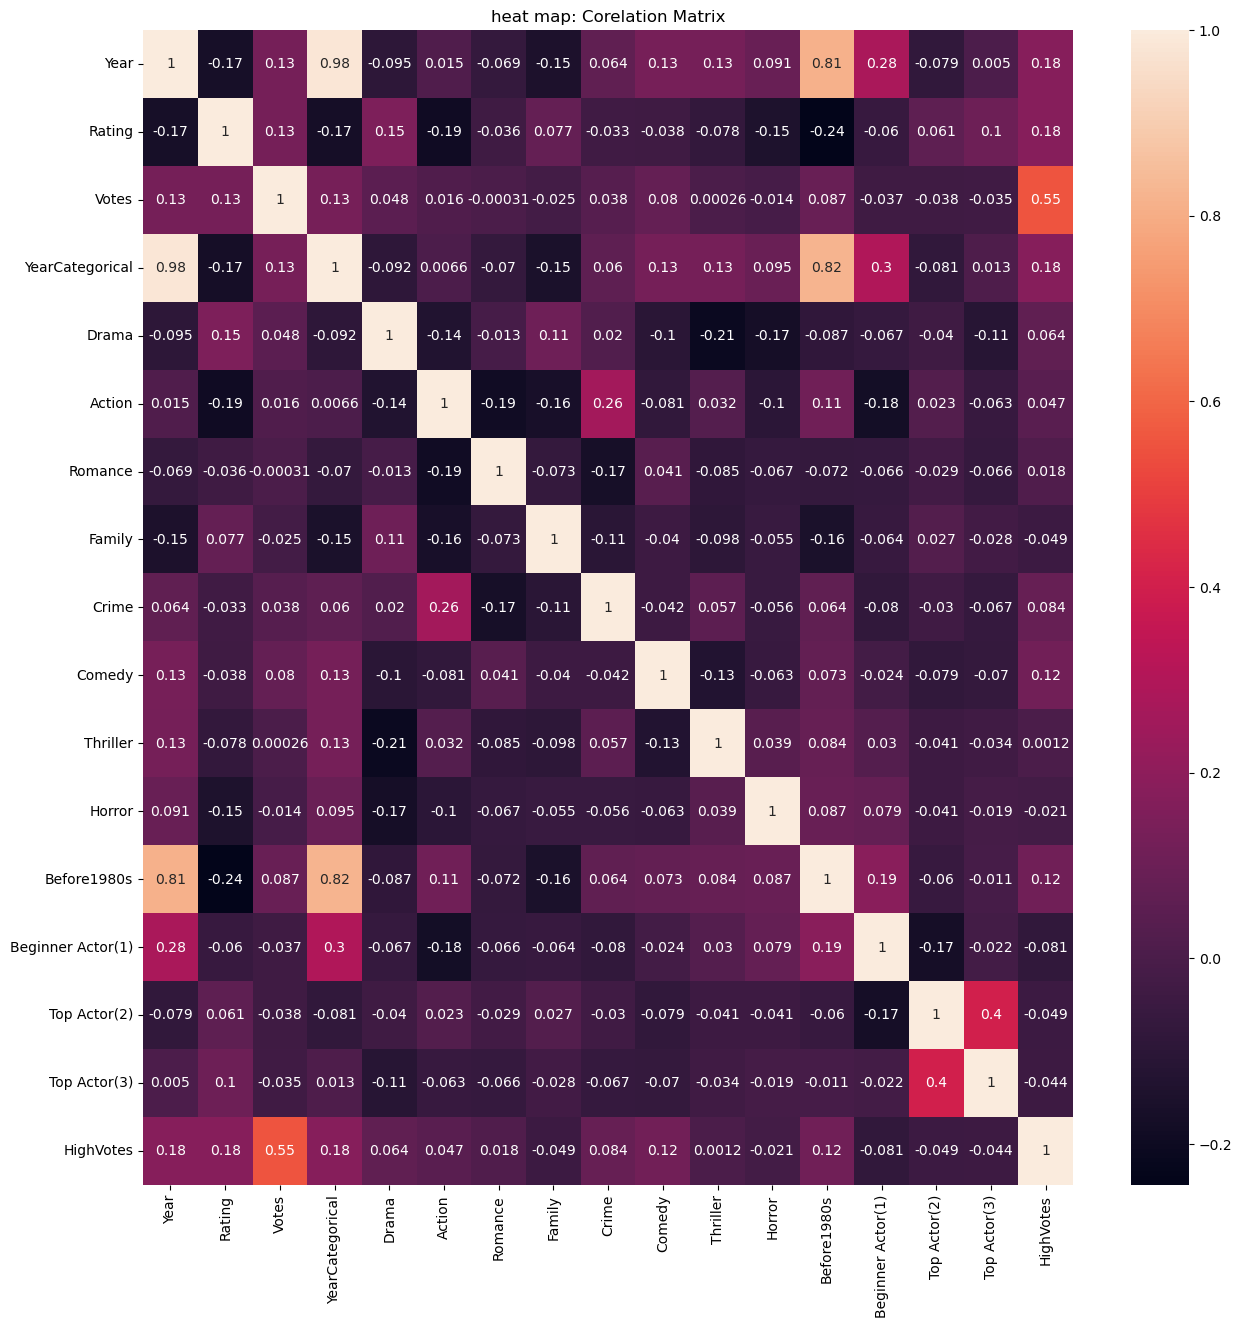

In [369]:
plt.figure(figsize=(15,15))
plt.title("heat map: Corelation Matrix")
sns.heatmap(df.corr(),annot=True)
plt.show()

In [370]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,YearCategorical,Drama,Action,Romance,Family,Crime,Comedy,Thriller,Horror,Before1980s,Beginner Actor(1),Top Actor(2),Top Actor(3),HighVotes
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7,1,0,0,0,0,0,0,0,1,1,0,0,0
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,7,0,0,1,0,0,1,0,0,1,1,0,0,0
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5,1,0,0,0,0,1,0,0,1,0,0,0,0
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6,1,0,1,0,0,0,0,0,1,0,0,0,0
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,7,0,0,0,0,0,0,1,1,1,1,0,0,0


In [371]:
df.shape

(7919, 24)

### ENCODING CATEGORICAL FEATURES

In [372]:
# Encoding with frequency
df["DirNoFlim"] = df["Director"].map(dict(df["Director"].value_counts()))
df["Actor1NoFlim"] = df["Actor 1"].map(dict(df["Actor 1"].value_counts()))
df["Actor2Flim"] = df["Actor 2"].map(dict(df["Actor 2"].value_counts()))
df["Actor3Flim"] = df["Actor 3"].map(dict(df["Actor 3"].value_counts()))
df["GenreEncoded"] = df["Genre"].map(dict(df["Genre"].value_counts()))

In [373]:
df["DirNoFlim"].corr(df["Rating"])

0.003252577569194935

In [374]:
df.corr()

,Year,Rating,Votes,YearCategorical,Drama,Action,Romance,Family,Crime,Comedy,Thriller,Horror,Before1980s,Beginner Actor(1),Top Actor(2),Top Actor(3),HighVotes,DirNoFlim,Actor1NoFlim,Actor2Flim,Actor3Flim,GenreEncoded
Year,1.000000,-0.166673,0.129016,0.984363,-0.094636,0.015254,-0.069263,-0.148756,0.064442,0.133224,0.125646,0.091087,0.813561,0.277231,-0.079233,0.004958,0.177769,-0.253795,-0.223884,-0.084146,0.007521,-0.087407
Rating,-0.166673,1.000000,0.126635,-0.173961,0.149719,-0.193820,-0.035512,0.077348,-0.033275,-0.038130,-0.077962,-0.146410,-0.244233,-0.059661,0.061480,0.104434,0.177642,0.003253,0.036104,0.093136,0.093126,0.121925
Votes,0.129016,0.126635,1.000000,0.131660,0.047928,0.016013,-0.000308,-0.024695,0.037509,0.080001,0.000261,-0.014059,0.086829,-0.037081,-0.038098,-0.034730,0.553981,-0.019556,-0.010025,-0.032116,-0.036597,-0.065006
YearCategorical,0.984363,-0.173961,0.131660,1.000000,-0.092341,0.006582,-0.070023,-0.154520,0.060407,0.128274,0.125500,0.095042,0.822460,0.295887,-0.080537,0.012786,0.178399,-0.262939,-0.237699,-0.083195,0.014862,-0.075862
Drama,-0.094636,0.149719,0.047928,-0.092341,1.000000,-0.136819,-0.013415,0.110033,0.019539,-0.103757,-0.206495,-0.172827,-0.086809,-0.066939,-0.039788,-0.114673,0.063762,0.027816,0.035128,-0.064396,-0.117594,0.370770
Action,0.015254,-0.193820,0.016013,0.006582,-0.136819,1.000000,-0.189377,-0.162936,0.259368,-0.081057,0.031834,-0.102239,0.112606,-0.179609,0.023247,-0.063419,0.046782,0.150367,0.172294,0.016379,-0.039671,-0.207057
Romance,-0.069263,-0.035512,-0.000308,-0.070023,-0.013415,-0.189377,1.000000,-0.073284,-0.168834,0.041442,-0.084869,-0.067100,-0.071727,-0.066004,-0.029172,-0.065516,0.017670,0.037733,0.035002,-0.032235,-0.068208,-0.187785
Family,-0.148756,0.077348,-0.024695,-0.154520,0.110033,-0.162936,-0.073284,1.000000,-0.107670,-0.040463,-0.097885,-0.055403,-0.156066,-0.063710,0.027065,-0.027599,-0.049118,0.025303,0.062879,0.018280,-0.019535,-0.143669
Crime,0.064442,-0.033275,0.037509,0.060407,0.019539,0.259368,-0.168834,-0.107670,1.000000,-0.042234,0.056920,-0.055684,0.063635,-0.079823,-0.030413,-0.066569,0.084053,0.039802,0.051339,-0.033187,-0.066610,-0.154271
Comedy,0.133224,-0.038130,0.080001,0.128274,-0.103757,-0.081057,0.041442,-0.040463,-0.042234,1.000000,-0.130061,-0.062690,0.072693,-0.024190,-0.079227,-0.069518,0.117286,-0.012560,-0.026631,-0.076757,-0.073783,-0.243104


In [375]:
# Final dataset for training
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,YearCategorical,Drama,Action,Romance,Family,Crime,Comedy,Thriller,Horror,Before1980s,Beginner Actor(1),Top Actor(2),Top Actor(3),HighVotes,DirNoFlim,Actor1NoFlim,Actor2Flim,Actor3Flim,GenreEncoded
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7,1,0,0,0,0,0,0,0,1,1,0,0,0,1,2,1,1,1279
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,7,0,0,1,0,0,1,0,0,1,1,0,0,0,1,5,1,2,120
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5,1,0,0,0,0,1,0,0,1,0,0,0,0,17,18,15,13,49
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6,1,0,1,0,0,0,0,0,1,0,0,0,0,7,25,4,8,5
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,7,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,6,1,11


### DATA REDUCTION

In [376]:
# removing features which is not required
df.drop(columns=['Name',"Year","Duration",'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'],inplace=True)


### DATA TRANSFORMATION TO VOTTING 
applying logerthemic transformation

In [377]:
# Skewness of the datset 
stats.skew(df["Votes"])

25.386589409596315

In [386]:
# Logerthemic tranfomation
def transform(x):
    if x <= 0:
        return x
    else:
        return math.log(x)

    
df["Votes"] = df["Votes"].apply(transform)

In [387]:
stats.skew(df["Votes"])

0.8310096703162353

In [388]:
df["Votes"].isnull().sum()

0

### DATASET SPLITTING

In [389]:
X = df.drop(columns=["Rating"])
y = df["Rating"]

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MODEL TRAINING
using Random Forest Regressor

In [391]:
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f'R-squared (R2) score: {r2}')   

R-squared (R2) score: 0.3766540052880222


### MODEL EVALUATION
1. Mean absolute error 
2. Mean squared error
3. Root mean squared error

In [395]:
mean_absolute_error(y_pred,y_test)

0.8221821537434226

In [396]:
mean_squared_error(y_pred,y_test) 

1.1588906770077616

In [397]:
np.sqrt(mean_squared_error(y_pred,y_test)) 

1.0765178479745525